In [1]:
import pandas as pd
from typing import List

# Importa las funciones que ahora están en recursos.py
from recursos import inspeccionar_duplicados, eliminar_duplicados_por_clave, limpiar_nulos_esenciales


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_info_columns', 50)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
pd.set_option('display.width', 1000)

In [7]:
#carrgar el dataset 1
df1_original = pd.read_csv(r'C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/PFinal/Data/Brutos/movies.csv')


In [8]:
df2_original = pd.read_csv(r'C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/PFinal/Data/Brutos/watch_history.csv')


In [9]:
df1_original.info()
df1_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             1040 non-null   object 
 1   title                1040 non-null   object 
 2   content_type         1040 non-null   object 
 3   genre_primary        1040 non-null   object 
 4   genre_secondary      373 non-null    object 
 5   release_year         1040 non-null   int64  
 6   duration_minutes     1040 non-null   float64
 7   rating               1040 non-null   object 
 8   language             1040 non-null   object 
 9   country_of_origin    1040 non-null   object 
 10  imdb_rating          890 non-null    float64
 11  production_budget    365 non-null    float64
 12  box_office_revenue   331 non-null    float64
 13  number_of_seasons    289 non-null    float64
 14  number_of_episodes   321 non-null    float64
 15  is_netflix_original  1040 non-null   b

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False


In [10]:
#miro cuantas filas tengo
df1_original.shape 


(1040, 18)

In [11]:
df2_original.info()
df2_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              105000 non-null  object 
 1   user_id                 105000 non-null  object 
 2   movie_id                105000 non-null  object 
 3   watch_date              105000 non-null  object 
 4   device_type             105000 non-null  object 
 5   watch_duration_minutes  92668 non-null   float64
 6   progress_percentage     96486 non-null   float64
 7   action                  105000 non-null  object 
 8   quality                 105000 non-null  object 
 9   location_country        105000 non-null  object 
 10  is_download             105000 non-null  bool   
 11  user_rating             21097 non-null   float64
dtypes: bool(1), float64(3), object(8)
memory usage: 8.9+ MB


,session_id,user_id,movie_id,watch_date,device_type,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
0,session_000001,user_07271,movie_0511,2025-11-13,Tablet,63.9,34.6,completed,HD,USA,False,NaN
1,session_000002,user_00861,movie_0588,2025-02-26,Laptop,120.1,44.2,started,HD,USA,False,NaN
2,session_000003,user_05391,movie_0694,2024-12-15,Desktop,572.1,84.7,started,HD,Canada,False,1.0
3,session_000004,user_05192,movie_0234,2024-09-30,Desktop,395.3,89.9,completed,SD,USA,False,5.0
4,session_000005,user_05735,movie_0390,2024-08-04,Tablet,14.6,6.2,completed,HD,USA,False,NaN


In [12]:
df2_original.shape 

(105000, 12)

In [13]:
#Hago copias de los dataframes originales para trabajar con ellas
df1 = df1_original.copy()
df2 = df2_original.copy() 

1.Limpieza y normalizacion de los datos

In [14]:
#cuento el numero de duplicados en cada dataframe
print(df1.duplicated().sum())

40


In [15]:
#exploro donde están esos duplicados
df1[df1.duplicated()]

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
1000,movie_0846,Storm Family,Stand-up Comedy,Action,Mystery,2024,61.0,TV-MA,English,USA,4.8,NaN,NaN,NaN,NaN,False,2024-03-03,True
1001,movie_0814,Adventure Legend,TV Series,Adventure,NaN,2004,62.0,TV-Y7,Korean,USA,6.3,NaN,NaN,11.0,13.0,False,2022-03-04,False
1002,movie_0537,New Story,Movie,Horror,NaN,1998,67.0,PG-13,Italian,UK,5.6,3291844.0,9.314738e+06,NaN,NaN,True,2022-08-16,True
1003,movie_0996,Secret Mission,TV Series,Sci-Fi,NaN,1997,69.0,NC-17,English,South Korea,6.4,NaN,NaN,2.0,24.0,False,2021-05-28,True
1004,movie_0586,A Adventure,Documentary,Drama,Documentary,2021,99.0,R,English,USA,4.4,NaN,NaN,NaN,NaN,True,2021-10-26,False
1005,movie_0932,Hero Empire,Limited Series,Sci-Fi,Adventure,1992,63.0,NC-17,English,USA,9.0,NaN,NaN,6.0,46.0,False,2021-04-22,False
1006,movie_0746,Fire Journey,Movie,Music,NaN,1995,82.0,TV-MA,Hindi,USA,0.8,954741.0,NaN,NaN,NaN,False,2025-03-09,False
1007,movie_0147,Dark Love,Documentary,Action,NaN,1996,34.0,G,Japanese,UK,3.9,NaN,NaN,NaN,NaN,False,2023-02-11,False
1008,movie_0305,Legend House,Movie,Adventure,Fantasy,1984,113.0,TV-MA,English,Japan,NaN,NaN,5.345563e+07,NaN,NaN,True,2021-06-14,False
1009,movie_0210,Princess Kingdom,Movie,Sport,NaN,2018,83.0,TV-14,German,Canada,2.7,2206961.0,NaN,NaN,NaN,False,2022-02-15,False


In [16]:
#inspecciono los duplicados con la función creada en recursos.py
df1_duplicados_catalogo = inspeccionar_duplicados(df=df1, columna_clave='movie_id')


In [17]:
# Si hay duplicados, los muestro ordenados y doy un resumen


if not df1_duplicados_catalogo.empty:
    # 2. Ordenar por la clave duplicada para ver las copias juntas
    df_duplicados_ordenados = df1_duplicados_catalogo.sort_values(by='movie_id')
    
    # 3. Mostrar el DataFrame completo
    display(df_duplicados_ordenados)
    
    # 4. Mostrar un resumen de cuántos registros se eliminarían
    conteo_a_eliminar = df1.duplicated(subset=['movie_id'], keep='first').sum()
    print(f"\nSe eliminarían {conteo_a_eliminar} registros (manteniendo la primera aparición).")

else:
    print("✅ No se encontraron duplicados de 'movie_id'.")



,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
33,movie_0034,Mission Kingdom,TV Series,War,Horror,2018,48.0,TV-PG,English,India,7.7,NaN,NaN,14.0,138.0,True,2023-10-22,True
1013,movie_0034,Mission Kingdom,TV Series,War,Horror,2018,48.0,TV-PG,English,India,7.7,NaN,NaN,14.0,138.0,True,2023-10-22,True
34,movie_0035,Princess Love,TV Series,Family,Romance,1994,38.0,TV-PG,English,USA,7.4,NaN,NaN,NaN,62.0,False,2021-03-01,False
1034,movie_0035,Princess Love,TV Series,Family,Romance,1994,38.0,TV-PG,English,USA,7.4,NaN,NaN,NaN,62.0,False,2021-03-01,False
42,movie_0043,City Queen,Documentary,Family,NaN,2005,80.0,PG-13,Spanish,USA,6.3,NaN,NaN,NaN,NaN,False,2022-12-12,False
1012,movie_0043,City Queen,Documentary,Family,NaN,2005,80.0,PG-13,Spanish,USA,6.3,NaN,NaN,NaN,NaN,False,2022-12-12,False
54,movie_0055,Queen Quest,Movie,Sci-Fi,NaN,2002,84.0,G,Italian,India,4.7,6494786.0,NaN,NaN,NaN,True,2023-11-21,True
1014,movie_0055,Queen Quest,Movie,Sci-Fi,NaN,2002,84.0,G,Italian,India,4.7,6494786.0,NaN,NaN,NaN,True,2023-11-21,True
1038,movie_0056,Big Princess,Movie,Adventure,Comedy,1997,137.0,TV-Y,English,USA,6.2,3593765.0,2.259750e+06,NaN,NaN,True,2021-01-18,False
55,movie_0056,Big Princess,Movie,Adventure,Comedy,1997,137.0,TV-Y,English,USA,6.2,3593765.0,2.259750e+06,NaN,NaN,True,2021-01-18,False



Se eliminarían 40 registros (manteniendo la primera aparición).


In [18]:
# Eliminar duplicados usando la función de recursos.py
df1 = eliminar_duplicados_por_clave(df=df1, columna_clave='movie_id')

In [19]:
#Ahora quiero normalizar los nombres de las columnas para que no haya problemas al trabajar con ellas
print(df1.columns.tolist())
#no necesita cambios

['movie_id', 'title', 'content_type', 'genre_primary', 'genre_secondary', 'release_year', 'duration_minutes', 'rating', 'language', 'country_of_origin', 'imdb_rating', 'production_budget', 'box_office_revenue', 'number_of_seasons', 'number_of_episodes', 'is_netflix_original', 'added_to_platform', 'content_warning']


In [20]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             1000 non-null   object 
 1   title                1000 non-null   object 
 2   content_type         1000 non-null   object 
 3   genre_primary        1000 non-null   object 
 4   genre_secondary      357 non-null    object 
 5   release_year         1000 non-null   int64  
 6   duration_minutes     1000 non-null   float64
 7   rating               1000 non-null   object 
 8   language             1000 non-null   object 
 9   country_of_origin    1000 non-null   object 
 10  imdb_rating          856 non-null    float64
 11  production_budget    353 non-null    float64
 12  box_office_revenue   322 non-null    float64
 13  number_of_seasons    275 non-null    float64
 14  number_of_episodes   305 non-null    float64
 15  is_netflix_original  1000 non-null   bool   

In [21]:
#convierto la columna que deberia ser fecha a tipo fecha
df1['added_to_platform'] = pd.to_datetime(df1['added_to_platform'], errors='coerce', dayfirst=True)

In [22]:
#ahora hago limpieza y normalización al df2 y ya despues hago los nulos más adelante
#Las columnas de df2 también están normalizadas
print(df2.columns.tolist())

['session_id', 'user_id', 'movie_id', 'watch_date', 'device_type', 'watch_duration_minutes', 'progress_percentage', 'action', 'quality', 'location_country', 'is_download', 'user_rating']


In [23]:

print(df2.duplicated().sum())

5000


In [24]:
df2[df2.duplicated()].sample(5)

,session_id,user_id,movie_id,watch_date,device_type,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
101495,session_023066,user_00152,movie_0588,2024-01-04,Mobile,63.9,32.9,paused,HD,USA,True,NaN
104281,session_010110,user_07676,movie_0223,2025-11-08,Mobile,NaN,69.1,paused,HD,USA,False,NaN
100062,session_092615,user_07073,movie_0814,2024-11-11,Smart TV,NaN,29.8,stopped,4K,USA,False,NaN
103234,session_098771,user_03798,movie_0940,2025-04-07,Mobile,77.7,38.7,stopped,4K,USA,False,5.0
104346,session_024806,user_03051,movie_0461,2024-11-21,Mobile,11.4,55.1,started,4K,USA,False,NaN


In [25]:
df_duplicados_comportamiento = inspeccionar_duplicados(df=df2, columna_clave='session_id')

In [26]:
if not df_duplicados_comportamiento.empty:
    registros_involucrados = len(df_duplicados_comportamiento)
    conteo_a_eliminar = df2.duplicated(subset=['session_id'], keep='first').sum()
    
    print(f"\n📢 Registros involucrados en duplicados de 'session_id': {registros_involucrados}")
    print(f"📢 Registros que se eliminarían (duplicados reales): {conteo_a_eliminar}")
else:
    print("✅ No se encontraron duplicados por 'session_id'.")


📢 Registros involucrados en duplicados de 'session_id': 9858
📢 Registros que se eliminarían (duplicados reales): 5000


In [27]:
#quiero ver una muestra de esos duplicados con el original y ver si hay diferencias
df_duplicados_muestra = df2[df2.duplicated(subset=['session_id'], keep=False)].sort_values(by='session_id').head(10)
display(df_duplicados_muestra)
#hay incluso filas triplicadas


,session_id,user_id,movie_id,watch_date,device_type,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
3,session_000004,user_05192,movie_0234,2024-09-30,Desktop,395.3,89.9,completed,SD,USA,False,5.0
103893,session_000004,user_05192,movie_0234,2024-09-30,Desktop,395.3,89.9,completed,SD,USA,False,5.0
6,session_000007,user_00467,movie_0483,2025-04-23,Desktop,165.9,63.1,stopped,HD,Canada,False,NaN
100747,session_000007,user_00467,movie_0483,2025-04-23,Desktop,165.9,63.1,stopped,HD,Canada,False,NaN
12,session_000013,user_06950,movie_0764,2024-07-06,Mobile,3.7,NaN,stopped,HD,Canada,False,NaN
101397,session_000013,user_06950,movie_0764,2024-07-06,Mobile,3.7,NaN,stopped,HD,Canada,False,NaN
104092,session_000015,user_05312,movie_0861,2025-10-17,Tablet,59.9,30.7,paused,4K,USA,False,5.0
104414,session_000015,user_05312,movie_0861,2025-10-17,Tablet,59.9,30.7,paused,4K,USA,False,5.0
14,session_000015,user_05312,movie_0861,2025-10-17,Tablet,59.9,30.7,paused,4K,USA,False,5.0
104208,session_000024,user_02559,movie_0285,2024-11-16,Laptop,74.6,9.3,started,HD,USA,False,NaN


In [28]:
#como veo que si hay duplicados, los elimino y ya no hay duplicados, de todas formas si hubiese algún duplicado no real no seria una cantidad significativa
df2 = eliminar_duplicados_por_clave(df=df2, columna_clave='session_id')

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              100000 non-null  object 
 1   user_id                 100000 non-null  object 
 2   movie_id                100000 non-null  object 
 3   watch_date              100000 non-null  object 
 4   device_type             100000 non-null  object 
 5   watch_duration_minutes  88229 non-null   float64
 6   progress_percentage     91906 non-null   float64
 7   action                  100000 non-null  object 
 8   quality                 100000 non-null  object 
 9   location_country        100000 non-null  object 
 10  is_download             100000 non-null  bool   
 11  user_rating             20114 non-null   float64
dtypes: bool(1), float64(3), object(8)
memory usage: 9.3+ MB


In [30]:
#convierto watch_date a formato fecha
df2['watch_date'] = pd.to_datetime(df2['watch_date'], errors='coerce', dayfirst=True)

C:\Users\Maria\AppData\Local\Temp\ipykernel_6572\1620078589.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df2['watch_date'] = pd.to_datetime(df2['watch_date'], errors='coerce', dayfirst=True)


1.2 Inconsistencias

In [31]:
columnas_numericas = ['duration_minutes', 'production_budget', 'box_office_revenue']

for col in columnas_numericas:
    print(f"\nEstadísticas para '{col}':")
    # Mostrar el mínimo, ya que valores negativos son inconsistentes
    print(df1[col].describe())

    # Buscar valores inconsistentes (ej. duración negativa)
    inconsistencias = df1[df1[col] < 0]
    
    if not inconsistencias.empty:
        print(f"📢 Se encontraron {len(inconsistencias)} registros con valor negativo en '{col}'.")
    else:
        print(f"✅ No se encontraron valores negativos en '{col}'.")


Estadísticas para 'duration_minutes':
count    1000.000000
mean       89.845000
std        70.319569
min         0.000000
25%        51.000000
50%        82.000000
75%       110.000000
max       586.000000
Name: duration_minutes, dtype: float64
✅ No se encontraron valores negativos en 'duration_minutes'.

Estadísticas para 'production_budget':
count    3.530000e+02
mean     1.119697e+07
std      2.426292e+07
min      6.837300e+04
25%      1.442937e+06
50%      3.778470e+06
75%      9.373108e+06
max      1.973266e+08
Name: production_budget, dtype: float64
✅ No se encontraron valores negativos en 'production_budget'.

Estadísticas para 'box_office_revenue':
count    3.220000e+02
mean     6.275292e+07
std      1.655949e+08
min      2.863700e+04
25%      3.334162e+06
50%      1.110259e+07
75%      4.562524e+07
max      2.032056e+09
Name: box_office_revenue, dtype: float64
✅ No se encontraron valores negativos en 'box_office_revenue'.


In [32]:
print("--- 🔎 Inconsistencia: Progreso de Visualización (progress_percentage) ---")

print(df2['progress_percentage'].describe())
#filtrar valores inconsistentes
inconsistencias_progreso = df2[
    (df2['progress_percentage'] > 100) | 
    (df2['progress_percentage'] < 0)
]

if not inconsistencias_progreso.empty:
    print(f"\n📢 Se encontraron {len(inconsistencias_progreso)} registros con progreso ILÓGICO (fuera de 0-100%):")
    display(inconsistencias_progreso[['session_id', 'progress_percentage']].head())
else:
    print("\n✅ No se encontraron valores fuera del rango 0-100% en 'progress_percentage'.")

--- 🔎 Inconsistencia: Progreso de Visualización (progress_percentage) ---
count    91906.000000
mean        49.967732
std         28.840165
min          0.000000
25%         25.000000
50%         49.800000
75%         74.900000
max        100.000000
Name: progress_percentage, dtype: float64

✅ No se encontraron valores fuera del rango 0-100% en 'progress_percentage'.


In [33]:

print(df2['watch_duration_minutes'].describe())

# Filtrar valores negativos
inconsistencias_duracion = df2[df2['watch_duration_minutes'] < 0]

if not inconsistencias_duracion.empty:
    print(f"\n📢 Se encontraron {len(inconsistencias_duracion)} registros con duración NEGATIVA:")
    display(inconsistencias_duracion[['session_id', 'watch_duration_minutes']].head())
else:
    print("\n✅ No se encontraron valores de duración negativos.")

count    88229.000000
mean        65.701101
std         68.277281
min          0.200000
25%         29.100000
50%         51.200000
75%         82.400000
max        799.300000
Name: watch_duration_minutes, dtype: float64

✅ No se encontraron valores de duración negativos.


1.3 Nulos

In [34]:
df1.isnull().sum()


movie_id                 0
title                    0
content_type             0
genre_primary            0
genre_secondary        643
release_year             0
duration_minutes         0
rating                   0
language                 0
country_of_origin        0
imdb_rating            144
production_budget      647
box_office_revenue     678
number_of_seasons      725
number_of_episodes     695
is_netflix_original      0
added_to_platform      624
content_warning          0
dtype: int64

In [35]:
#visualizo solo columnas con nulos
missing_summary = df1.isna().sum().reset_index()
missing_summary.columns = ['Column', 'MissingValues']
missing_summary = missing_summary[missing_summary['MissingValues'] > 0].sort_values(by='MissingValues', ascending=False)

print(missing_summary)

                Column  MissingValues
13   number_of_seasons            725
14  number_of_episodes            695
12  box_office_revenue            678
11   production_budget            647
4      genre_secondary            643
16   added_to_platform            624
10         imdb_rating            144


In [36]:
df1_nulos = pd.DataFrame((df1.isnull().sum()/df1.shape[0])*100, columns=['Nulos'])
print(df1_nulos)

                     Nulos
movie_id               0.0
title                  0.0
content_type           0.0
genre_primary          0.0
genre_secondary       64.3
release_year           0.0
duration_minutes       0.0
rating                 0.0
language               0.0
country_of_origin      0.0
imdb_rating           14.4
production_budget     64.7
box_office_revenue    67.8
number_of_seasons     72.5
number_of_episodes    69.5
is_netflix_original    0.0
added_to_platform     62.4
content_warning        0.0


In [37]:
#relleno los nulos de genre_secondary con None porque no tod tiene genero secundario
df1['genre_secondary'] = df1['genre_secondary'].fillna('None')

In [38]:
# ahora imbd_rating con la media
df1['imdb_rating'] = df1['imdb_rating'].fillna(df1['imdb_rating'].mean())


In [39]:
# Filtro los nulos de production_budget a una variable de si tiene o no dato    
df1['has_production_budget'] = df1['production_budget'].notnull().astype(int)
df1['production_budget'] = df1['production_budget'].fillna(0)
# asi podré filtrar después si tiene o no presupuesto y evitar sesgos con esa columna temporal  


In [40]:
#con box_office_revenue hago lo mismo
df1['has_box_office_revenue'] = df1['box_office_revenue'].notnull().astype(int)
df1['box_office_revenue'] = df1['box_office_revenue'].  fillna(0)   

In [41]:
# y con number_of_seasons hago algo similar pero distinguiendo entre serie, pelicula y otra cosa
df1['content_type'].value_counts()



content_type
Movie              444
TV Series          254
Documentary        136
Stand-up Comedy    115
Limited Series      51
Name: count, dtype: int64

In [42]:
df1['has_number_of_seasons'] = df1['number_of_seasons'].notnull().astype(int)
#si es pelicula le pongo 0 temporadas
df1.loc[df1['content_type'] == 'Movie', 'number_of_seasons'] = 0
#si es tv series o limited series y es nulo imputo con mediana  
median_tv_series = df1.loc[df1['content_type'] == 'TV Series', 'number_of_seasons'].median()
median_limited_series = df1.loc[df1['content_type'] == 'Limited Series', 'number_of_seasons'].median()

df1.loc[(df1['content_type'] == 'TV Series') & (df1['number_of_seasons'].isnull()),'number_of_seasons'] = median_tv_series

df1.loc[(df1['content_type'] == 'Limited Series') & (df1['number_of_seasons'].isnull()),'number_of_seasons'] = median_limited_series

In [43]:
#y termino rellenando nulos en documentary con 0 porque no tiene temporadas
df1.loc[(df1['genre_primary'] == 'Documentary') & (df1['number_of_seasons'].isnull()), 'number_of_seasons'] = 0
#Hago lo mismo con stand-up comedy
df1.loc[(df1['genre_primary'] == 'Stand-Up Comedy') & (df1['number_of_seasons'].isnull()), 'number_of_seasons'] = 0

In [44]:
print(df1['number_of_seasons'].isnull().sum())
print(df1.groupby('content_type')['number_of_seasons'].describe())


242
                 count      mean       std  min  25%  50%   75%   max
content_type                                                         
Documentary        6.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Limited Series    51.0  7.607843  3.800413  1.0  5.0  7.0  10.5  14.0
Movie            444.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Stand-up Comedy    3.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
TV Series        254.0  7.200787  3.875921  1.0  4.0  7.0  10.0  14.0


In [45]:
#con los nulos de number_of_episodes hago algo similar pero solo que las peliculas tienen 0 episodios
df1['has_number_of_episodes'] = df1['number_of_episodes'].notnull().astype(int)
df1.loc[df1['content_type'] == 'Movie', 'number_of_episodes'] = 0
#esto es porque para el analisis no me interesa tanto el numero de episodios como el numero de temporadas y con tratar las peliculas ya es suficiente
print(df1['number_of_episodes'].isnull().sum())

251


In [46]:
#con added_to_platform no lo pongo como desconocido proque puede ser que nunca se haya añadido a la plataforma o similar
df1['added_to_platform'] = df1['added_to_platform'].fillna('Unknown')


-Ahora los nulos de df2

In [47]:
df2.isnull().sum()

session_id                    0
user_id                       0
movie_id                      0
watch_date                    0
device_type                   0
watch_duration_minutes    11771
progress_percentage        8094
action                        0
quality                       0
location_country              0
is_download                   0
user_rating               79886
dtype: int64

In [48]:
#miro los valores unicos de action porque puede influir en watch_duration_minutes
df2['action'].unique()


array(['completed', 'started', 'stopped', 'paused'], dtype=object)

In [49]:
df2['action'].value_counts()


action
started      25207
paused       24983
stopped      24977
completed    24833
Name: count, dtype: int64

In [50]:

#miro los nulos de watch_duration_minutes por cada action 
df2['watch_duration_minutes'].isnull().groupby(df2['action']).sum() 

action
completed    2866
paused       2939
started      3015
stopped      2951
Name: watch_duration_minutes, dtype: int64

In [51]:
#imputo los nulos de watch_duration_minutes con la mediana por cada action porque todas son acciones de visualizacion y por tanto los nulos son errores o datos faltantes
df2['watch_duration_minutes'] = df2.groupby('action')['watch_duration_minutes'].transform(lambda x: x.fillna(x.median()))   

In [52]:
print(df2['progress_percentage'].isnull().sum())
print(df2.groupby('action')['progress_percentage'].apply(lambda x: x.isnull().mean() * 100))


8094
action
completed    8.267225
paused       8.153544
started      7.914468
stopped      8.043400
Name: progress_percentage, dtype: float64


In [53]:
#hago lo mismo con progress_percentage porque el caso es similar
df2['progress_percentage'] = df2.groupby('action')['progress_percentage'].transform(lambda x: x.fillna(x.median()))

In [54]:
#con user rating hago una separacion de las personas que dejan rating y las que no y mantengo los nulos sin imputar (esto es porque la gente no deja siempre valoraciones, de hecho es lo menos común)
df2['has_user_rating'] = df2['user_rating'].notnull().astype(int)

In [55]:
#miro las columnas que hay en df2   
df1.columns.tolist()    

['movie_id',
 'title',
 'content_type',
 'genre_primary',
 'genre_secondary',
 'release_year',
 'duration_minutes',
 'rating',
 'language',
 'country_of_origin',
 'imdb_rating',
 'production_budget',
 'box_office_revenue',
 'number_of_seasons',
 'number_of_episodes',
 'is_netflix_original',
 'added_to_platform',
 'content_warning',
 'has_production_budget',
 'has_box_office_revenue',
 'has_number_of_seasons',
 'has_number_of_episodes']

In [56]:
df2.columns.tolist()

['session_id',
 'user_id',
 'movie_id',
 'watch_date',
 'device_type',
 'watch_duration_minutes',
 'progress_percentage',
 'action',
 'quality',
 'location_country',
 'is_download',
 'user_rating',
 'has_user_rating']

In [57]:
#guardo los dataframes limpios en csv para usarlos en el analisis
df1.to_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/PFinal/Data/df1_movies_limpio.csv',index=False)
df2.to_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/PFinal/Data/df2_watch_history_limpio.csv', index=False)

2. Análisis descriptivo y estadístico

In [58]:
#primero empezamos analizando df1 por separado, luego df2 y luego los juntomos para el analisis conjunto
#primero mido en porcentaje en movies cuantas peliculas, series y demas hay de cada tipo
df1['content_type'].value_counts(normalize=True) * 100

content_type
Movie              44.4
TV Series          25.4
Documentary        13.6
Stand-up Comedy    11.5
Limited Series      5.1
Name: proportion, dtype: float64

In [59]:
#ahora miro el top 10 de genelos primarios
df1['genre_primary'].value_counts().head(10)

genre_primary
Adventure      68
Comedy         59
Animation      58
Sci-Fi         57
Action         57
War            57
Western        54
History        52
Romance        51
Documentary    50
Name: count, dtype: int64

In [60]:
pd.crosstab(df1['content_type'], df1['genre_primary'])


genre_primary,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
content_type,,,,,,,,,,,,,,,,,,,,
Documentary,9,6,6,9,3,4,6,7,6,9,8,8,6,3,11,8,7,6,8,6
Limited Series,4,1,4,3,4,2,3,0,4,2,1,1,1,4,5,7,2,2,0,1
Movie,22,30,26,27,32,22,24,21,19,22,25,21,16,18,16,24,14,15,25,25
Stand-up Comedy,9,12,5,2,3,7,3,5,6,3,4,4,8,4,5,8,5,7,8,7
TV Series,13,19,17,9,17,13,14,11,10,11,14,12,13,10,14,10,9,7,16,15


In [61]:
df1.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,has_production_budget,has_box_office_revenue,has_number_of_seasons,has_number_of_episodes
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,6.281425,0.0,0.0,NaN,NaN,False,2023-07-08 00:00:00,False,0,0,0,0
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,None,2017,37.0,PG,Japanese,USA,3.300000,0.0,0.0,NaN,NaN,False,Unknown,True,0,0,0,0
2,movie_0003,Fire Family,Movie,Drama,None,2003,142.0,TV-MA,English,USA,8.500000,2114120.0,0.0,0.0,0.0,False,2021-04-05 00:00:00,True,1,0,0,0
3,movie_0004,Our Princess,Documentary,Sci-Fi,None,2011,131.0,NC-17,Japanese,USA,5.300000,0.0,0.0,NaN,NaN,False,Unknown,False,0,0,0,0
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.100000,0.0,0.0,NaN,NaN,False,Unknown,False,0,0,0,0


In [62]:
#ahora la media de duración de las peliculas y series
df1.groupby('content_type')['duration_minutes'].mean()

content_type
Documentary         93.330882
Limited Series      61.627451
Movie              117.078829
Stand-up Comedy     79.043478
TV Series           50.929134
Name: duration_minutes, dtype: float64

In [63]:
#ahora la distribución del rating
df1['rating'].value_counts(normalize=True).sort_index() * 100

rating
G        9.3
NC-17    9.8
PG       9.6
PG-13    9.1
R        7.8
TV-14    9.7
TV-G     7.3
TV-MA    9.3
TV-PG    8.8
TV-Y     9.9
TV-Y7    9.4
Name: proportion, dtype: float64

In [64]:
#mido la distribución por lenguaje
df1['language'].value_counts(normalize=True).head(10) * 100

language
English     58.5
Spanish      9.9
French       6.5
Hindi        5.8
Japanese     5.3
Italian      5.1
Korean       4.9
German       4.0
Name: proportion, dtype: float64

In [65]:
#mido el pais de origen
df1['country_of_origin'].value_counts(normalize=True).head(10) * 100

country_of_origin
USA            52.6
South Korea    11.2
Canada          9.8
UK              8.3
Japan           5.4
Germany         4.7
France          4.3
India           3.7
Name: proportion, dtype: float64

In [66]:
#ahora por año de lanzamiento
df1['release_year'].value_counts().sort_index()



release_year
1953     1
1954     1
1956     2
1961     2
1963     1
1965     1
1966     2
1973     1
1978     1
1979     1
1981     1
1984     1
1986     1
1990    31
1991    22
1992    24
1993    33
1994    25
1995    29
1996    21
1997    35
1998    38
1999    26
2000    26
2001    29
2002    36
2003    34
2004    23
2005    28
2006    26
2007    22
2008    25
2009    23
2010    22
2011    35
2012    25
2013    26
2014    30
2015    31
2016    24
2017    26
2018    40
2019    20
2020    36
2021    23
2022    30
2023    28
2024    32
Name: count, dtype: int64

In [67]:
#ahora por promedio de imbd_rating
df1['imdb_rating'].value_counts().sort_index()

imdb_rating
0.500000       1
0.600000       3
0.700000       3
0.800000       3
0.900000       3
1.000000       1
1.200000       3
1.300000       2
1.400000       4
1.600000       1
1.700000       4
1.800000       1
2.000000       2
2.500000       1
2.600000       3
2.700000       4
2.900000       1
3.000000       3
3.100000       3
3.200000       2
3.300000       4
3.400000       4
3.500000       3
3.600000       3
3.700000       7
3.800000       4
3.900000       5
4.000000       6
4.100000       5
4.200000       3
4.300000       5
4.400000      12
4.500000       6
4.600000      11
4.700000      13
4.800000      18
4.900000      17
5.000000      11
5.100000      12
5.200000      15
5.300000      12
5.400000      12
5.500000      18
5.600000      21
5.700000      12
5.800000      13
5.900000      22
6.000000      18
6.100000      21
6.200000      24
6.281425     144
6.300000      27
6.400000      23
6.500000      28
6.600000      25
6.700000      12
6.800000      25
6.900000      24
7.

In [68]:
df1.groupby('content_type')['imdb_rating'].mean()


content_type
Documentary        6.197678
Limited Series     6.153949
Movie              6.296898
Stand-up Comedy    6.119701
TV Series          6.398037
Name: imdb_rating, dtype: float64

In [69]:
#ahora medimos la rentabilidad media de las peliculas y series de los que tenemos datos de box office revenue y production budget
df1_with_revenue = df1[(df1['has_box_office_revenue'] == 1) & (df1['has_production_budget'] == 1)]
#lo visualizo
df1_with_revenue[['production_budget', 'box_office_revenue']].describe()    

,production_budget,box_office_revenue
count,2.600000e+02,2.600000e+02
mean,1.090930e+07,6.554970e+07
std,2.269138e+07,1.777195e+08
min,6.837300e+04,4.532100e+04
25%,1.418334e+06,3.512801e+06
50%,4.006435e+06,1.161210e+07
75%,9.810028e+06,4.697144e+07
max,1.973266e+08,2.032056e+09


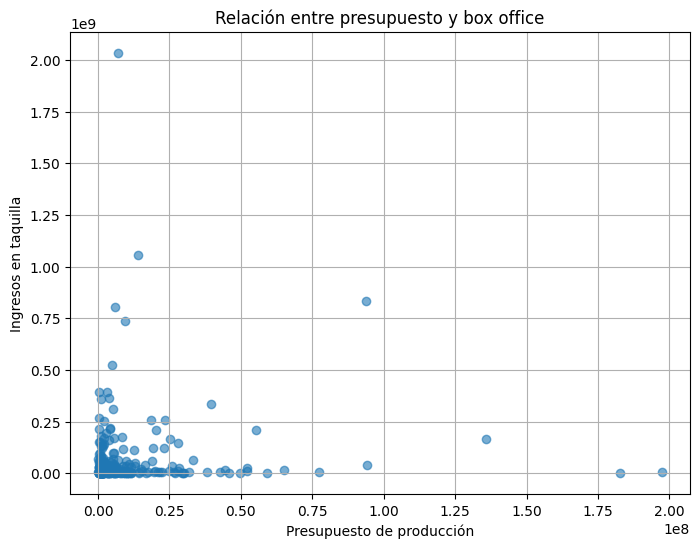

In [70]:
#Hago una visualizacion porque los datos estan muy dispersos y son complejos de analizar solo con estadisticas

plt.figure(figsize=(8,6))
plt.scatter(df1_with_revenue['production_budget'], df1_with_revenue['box_office_revenue'], alpha=0.6)
plt.xlabel('Presupuesto de producción')
plt.ylabel('Ingresos en taquilla')
plt.title('Relación entre presupuesto y box office')
plt.grid(True)
plt.show()


In [71]:
#veo que la mayoria de las peliculas, series y demas contenidos tienen un presupuesto de produccion bajo 50 millones y unos ingresos en taquilla bajos de 200 millones, por lo que la mayoria de los contenidos no son superproducciones hollywoodienses

In [72]:
#miro cuantas producciones originales de netflix hay en el catalogo 

df1['is_netflix_original'].value_counts(normalize=True) * 100


is_netflix_original
False    69.4
True     30.6
Name: proportion, dtype: float64

-Ahora con df2

In [73]:
#mido la frecuencia de las acciones de visualizacion en df2
df2['action'].value_counts(normalize=True) * 100
#veo que está muy equilibrado entre empezar a ver, terminar de ver y abandonar contenido

action
started      25.207
paused       24.983
stopped      24.977
completed    24.833
Name: proportion, dtype: float64

In [74]:
#ahora la distribución por paises de los usuarios que ven contenido
df2['location_country'].value_counts(normalize=True) * 100 


location_country
USA       69.667
Canada    30.333
Name: proportion, dtype: float64

In [75]:
#calculo la diferencia de comportamiento entre usuarios por pais y su comportamiento de visualizacion   
df2.groupby('location_country')['action'].value_counts(normalize=True).unstack().round(3) * 100



action,completed,paused,started,stopped
location_country,,,,
Canada,24.8,25.1,25.1,24.9
USA,24.8,24.9,25.2,25.0


In [76]:
#la media de user_rating en df2
df2['user_rating'].mean()


np.float64(3.3551257830366907)

In [77]:
df2.head()

,session_id,user_id,movie_id,watch_date,device_type,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating,has_user_rating
0,session_000001,user_07271,movie_0511,2025-11-13,Tablet,63.9,34.6,completed,HD,USA,False,NaN,0
1,session_000002,user_00861,movie_0588,2025-02-26,Laptop,120.1,44.2,started,HD,USA,False,NaN,0
2,session_000003,user_05391,movie_0694,2024-12-15,Desktop,572.1,84.7,started,HD,Canada,False,1.0,1
3,session_000004,user_05192,movie_0234,2024-09-30,Desktop,395.3,89.9,completed,SD,USA,False,5.0,1
4,session_000005,user_05735,movie_0390,2024-08-04,Tablet,14.6,6.2,completed,HD,USA,False,NaN,0


In [78]:
#ahora el tiempo medio de duración de visualización
df2['watch_duration_minutes'].mean()

np.float64(64.000407)

In [79]:
#ahora el porcentaje segun la calidad
df2['quality'].value_counts(normalize=True) * 100

quality
HD          49.961
4K          29.909
SD          15.136
Ultra HD     4.994
Name: proportion, dtype: float64

In [80]:
#miro el porcentaje de is_downloaded
df2['is_download'].value_counts(normalize=True) * 100

is_download
False    79.885
True     20.115
Name: proportion, dtype: float64

-Hago merge

In [81]:
df_merged = pd.merge(df2, df1, on='movie_id', how='inner')


In [82]:
#analizo que generos se ven mas 
df_merged['genre_primary'].value_counts(normalize=True) * 100

genre_primary
Adventure      6.841
Animation      5.953
Comedy         5.833
War            5.676
Sci-Fi         5.661
Action         5.648
Western        5.455
History        5.220
Romance        5.133
Biography      5.125
Documentary    5.071
Crime          4.733
Fantasy        4.635
Horror         4.576
Family         4.514
Music          4.319
Drama          4.286
Mystery        3.857
Sport          3.759
Thriller       3.705
Name: proportion, dtype: float64

In [83]:
#los netflix originals tienen mejor rating medio que el resto
df_merged.groupby('is_netflix_original')['user_rating'].mean()

is_netflix_original
False    3.349245
True     3.368311
Name: user_rating, dtype: float64

In [84]:
#los netflix originals son los que mas se ven
df_merged['is_netflix_original'].value_counts(normalize=True) * 100

is_netflix_original
False    69.486
True     30.514
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Relación entre IMDb Rating y User Rating')

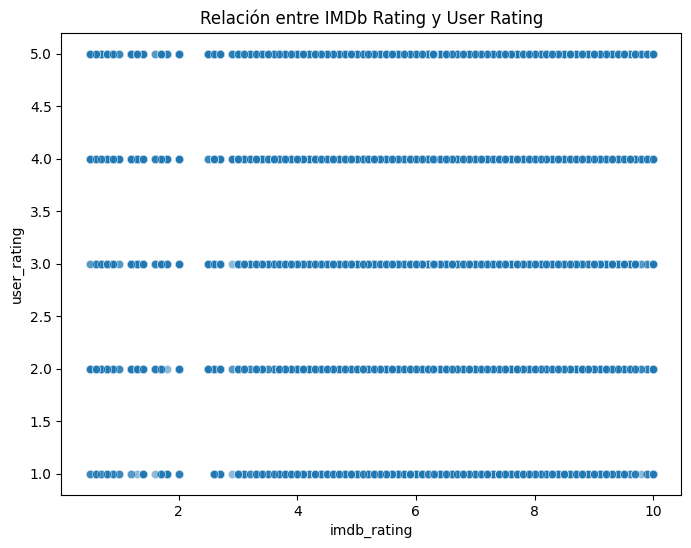

In [85]:
#hay relacion entre imdb_rating y user_rating
df_merged[['imdb_rating', 'user_rating']].corr()
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x='imdb_rating', y='user_rating', alpha=0.5)
plt.title('Relación entre IMDb Rating y User Rating')   

In [86]:
#que generos se completan más con las visualizaciones
df_merged.groupby('genre_primary')['progress_percentage'].mean().sort_values(ascending=False).head(10)
  


genre_primary
Family       50.494417
Western      50.455032
Drama        50.446150
Action       50.374504
Crime        50.261589
Horror       50.259419
Comedy       50.199880
Sci-Fi       50.182618
Adventure    50.106680
Biography    50.043044
Name: progress_percentage, dtype: float64

In [87]:
df_merged.groupby('device_type')['watch_duration_minutes'].mean().sort_values(ascending=False)


device_type
Smart TV    64.840409
Desktop     64.681327
Laptop      63.921783
Mobile      63.335063
Tablet      63.222706
Name: watch_duration_minutes, dtype: float64

In [88]:
#que generos tienen más abandonos
df_merged[df_merged['action'] == 'stopped']['genre_primary'].value_counts().head(10)


genre_primary
Adventure    1667
Animation    1540
Comedy       1513
Action       1450
War          1398
Sci-Fi       1378
Western      1367
Biography    1341
History      1294
Romance      1249
Name: count, dtype: int64

,production_budget,watch_duration_minutes
production_budget,1.000000,0.001267
watch_duration_minutes,0.001267,1.000000


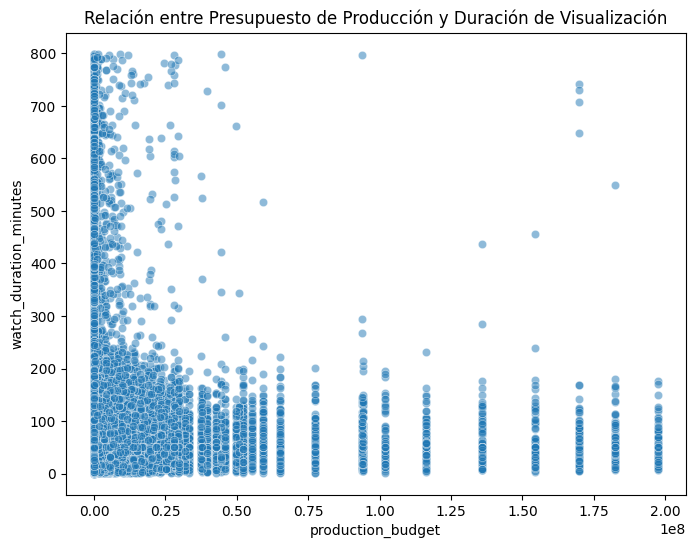

In [89]:
#analisis del rendimiento del contenido en funcion del presupuesto de produccion    

df_merged[['production_budget', 'watch_duration_minutes']].corr()
plt.figure(figsize=(8,6))   
sns.scatterplot(data=df_merged, x='production_budget', y='watch_duration_minutes', alpha=0.5)
plt.title('Relación entre Presupuesto de Producción y Duración de Visualización')
df_merged[['production_budget', 'watch_duration_minutes']].corr()



In [90]:
#dispositivos con mejor calidad de visualizacion
df_merged.groupby('device_type')['quality'].value_counts(normalize=True).unstack().round(3) * 100


quality,4K,HD,SD,Ultra HD
device_type,,,,
Desktop,30.2,49.5,15.2,5.1
Laptop,29.9,50.2,14.8,5.1
Mobile,29.4,50.6,15.1,4.9
Smart TV,30.1,50.0,15.1,4.8
Tablet,30.0,49.5,15.5,5.0


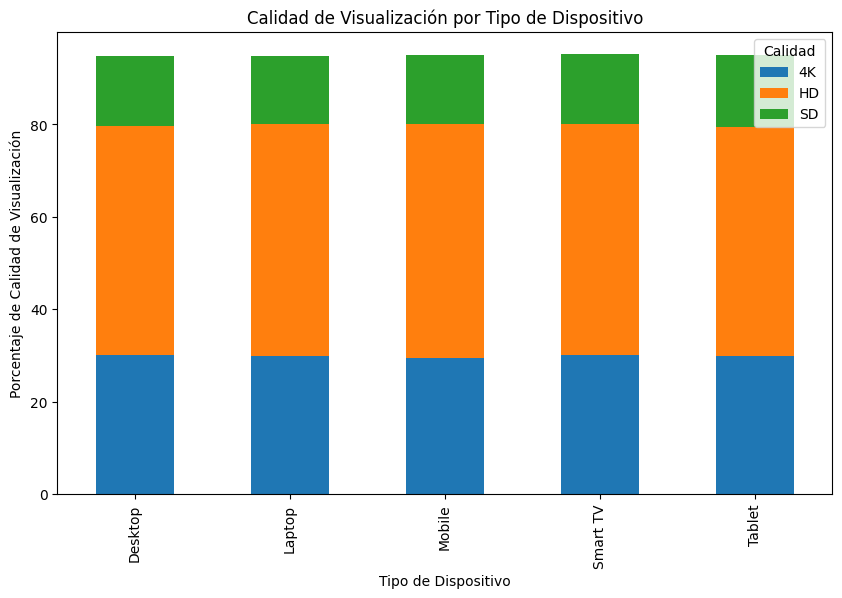

In [91]:
#los ordeno de mejor a peor calidad
df_quality_ordered = df_merged.groupby('device_type')['quality'].value_counts(normalize=True).unstack().round(3) * 100
df_quality_ordered = df_quality_ordered[['4K', 'HD', 'SD']]
df_quality_ordered.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Calidad de Visualización por Tipo de Dispositivo')
plt.xlabel('Tipo de Dispositivo')       
plt.ylabel('Porcentaje de Calidad de Visualización')
plt.legend(title='Calidad', loc='upper right')

In [92]:
#top 10 titulos mas vistos
df_merged['title'].value_counts().head(10)

title
A Quest            605
A Adventure        603
Mystery Mystery    489
Story Warrior      464
Our Queen          435
Story Mystery      413
Dark Ice           412
Old House          408
Phoenix Day        396
Dragon Princess    396
Name: count, dtype: int64

In [93]:
#dispositivos con más descargas
df_merged[df_merged['is_download'] == True]['device_type'].value_counts()

device_type
Tablet      4070
Desktop     4064
Laptop      4030
Mobile      3995
Smart TV    3956
Name: count, dtype: int64

In [94]:
#que tipo de contenido tiene mas descargas
df_merged[df_merged['is_download'] == True]['content_type'].value_counts()

content_type
Movie              8939
TV Series          5103
Documentary        2739
Stand-up Comedy    2337
Limited Series      997
Name: count, dtype: int64

2.1-Analisis estadístico

,imdb_rating,user_rating
imdb_rating,1.000000,-0.000439
user_rating,-0.000439,1.000000


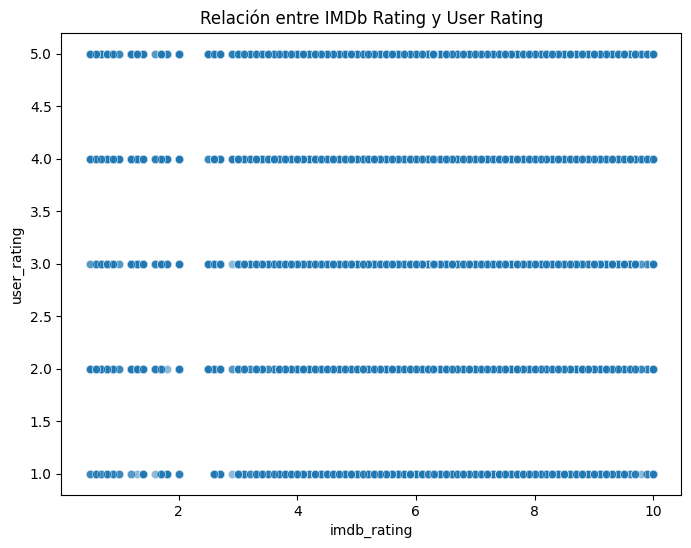

In [95]:
#¿Hay relación entre IMDB rating y user rating?
df_merged[['imdb_rating', 'user_rating']].corr()
plt.figure(figsize=(8,6))   
sns.scatterplot(data=df_merged, x='imdb_rating', y='user_rating', alpha=0.5)
plt.title('Relación entre IMDb Rating y User Rating')
df_merged[['imdb_rating', 'user_rating']].corr()


Text(0.5, 1.0, 'Proporción Media de Completitud por Tipo de Dispositivo')

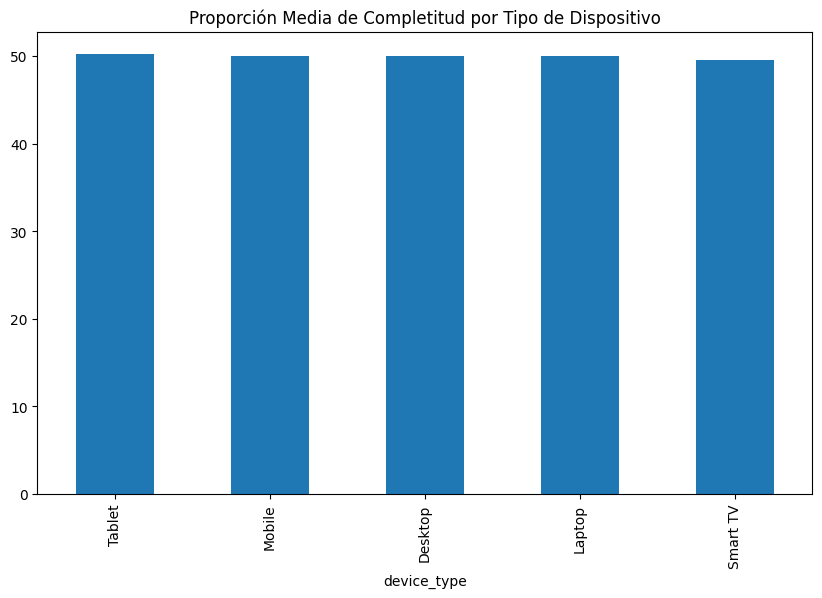

In [96]:
#¿La proporción de usuarios que completan varía por dispositivo?
completion_rates = df_merged.groupby('device_type')['progress_percentage'].mean().sort_values(ascending=False)
completion_rates.plot(kind='bar', figsize=(10,6))
plt.title('Proporción Media de Completitud por Tipo de Dispositivo')    


In [97]:
#instalo scipy para hacer el análisis estadístico chi-cuadrado
%pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
#el tipo de dispositivo aferta a la acción de visualización?
contingency_table = pd.crosstab(df_merged['device_type'], df_merged['action'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")





Chi-cuadrado: 6.648082206716721, p-valor: 0.8799671417562114


3. Visualizaciones

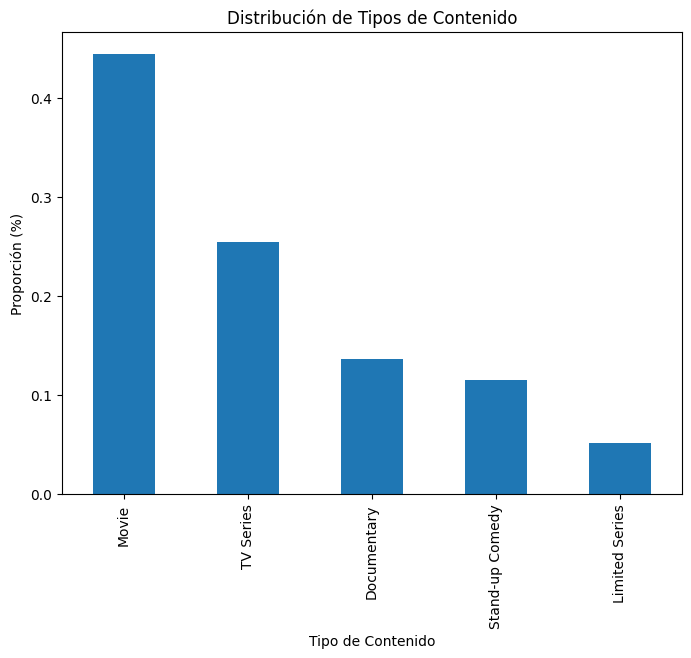

In [99]:
df1['content_type'].value_counts(normalize=True) * 100
#visualizo con un grafico de barras
df1['content_type'].value_counts(normalize=True).plot(kind='bar', figsize=(8,6))
plt.title('Distribución de Tipos de Contenido') 
plt.xlabel('Tipo de Contenido')
plt.ylabel('Proporción (%)')
plt.show()

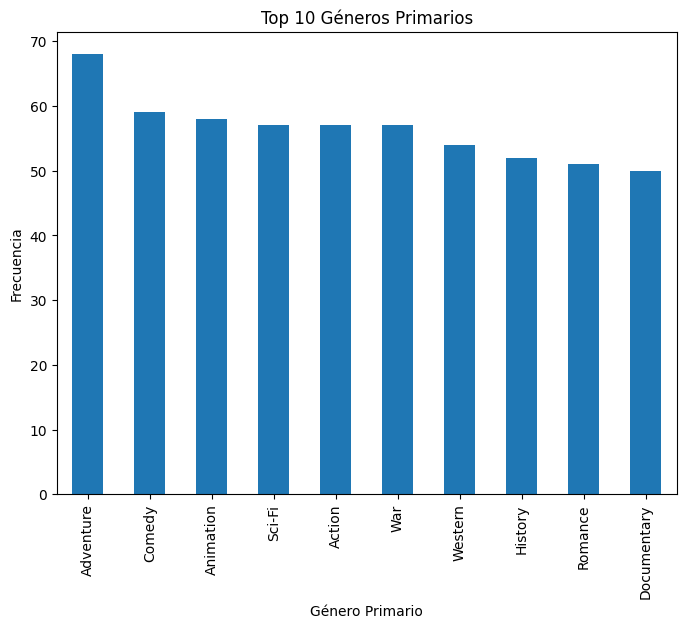

In [100]:
df1['genre_primary'].value_counts().head(10)
#visualizo con un grafico de barras
df1['genre_primary'].value_counts().head(10).plot(kind='bar', figsize=(8,6))
plt.title('Top 10 Géneros Primarios')   
plt.xlabel('Género Primario')
plt.ylabel('Frecuencia')
plt.show()

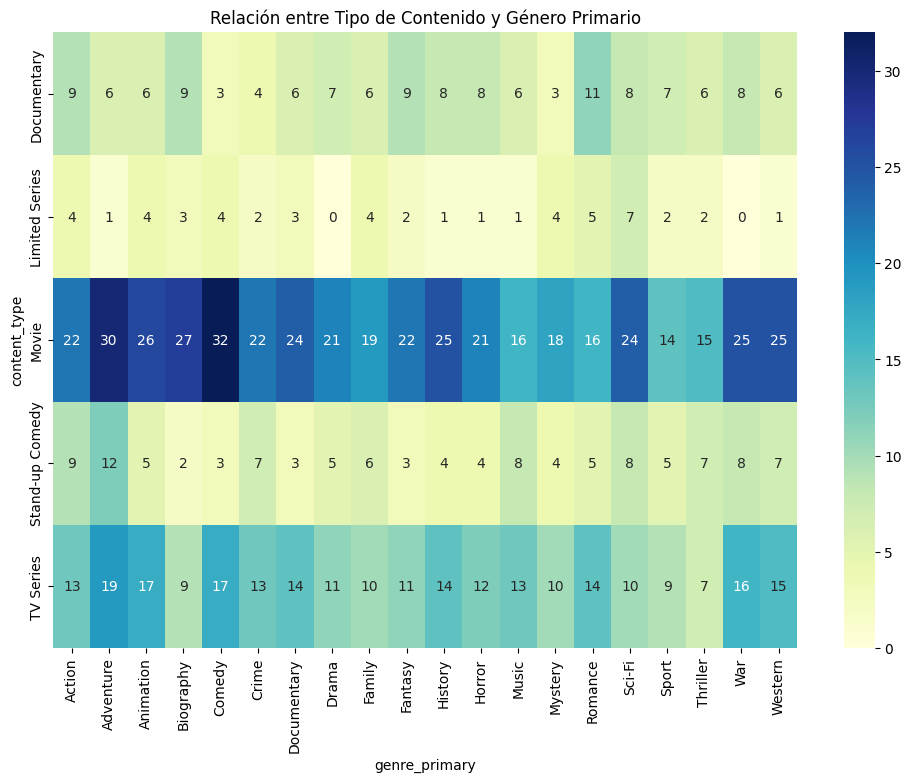

In [101]:
pd.crosstab(df1['content_type'], df1['genre_primary'])
#visualizo con un heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df1['content_type'], df1['genre_primary']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Tipo de Contenido y Género Primario')
#muestra la relación entre ambos con más titulos en ciertos géneros y tipos de contenido
plt.show()

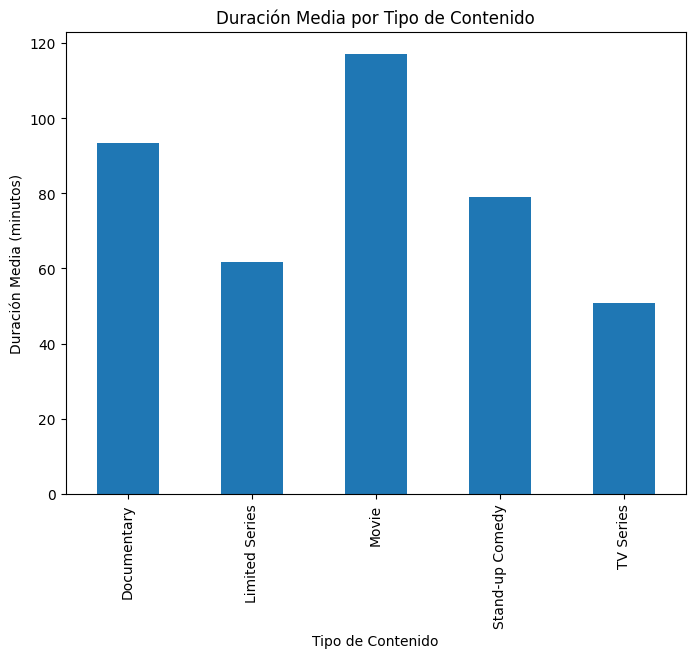

In [102]:
df1.groupby('content_type')['duration_minutes'].mean()
#visualizo con un grafico de barras
df1.groupby('content_type')['duration_minutes'].mean().plot(kind='bar', figsize=(8,6))
plt.title('Duración Media por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Duración Media (minutos)')
plt.show()

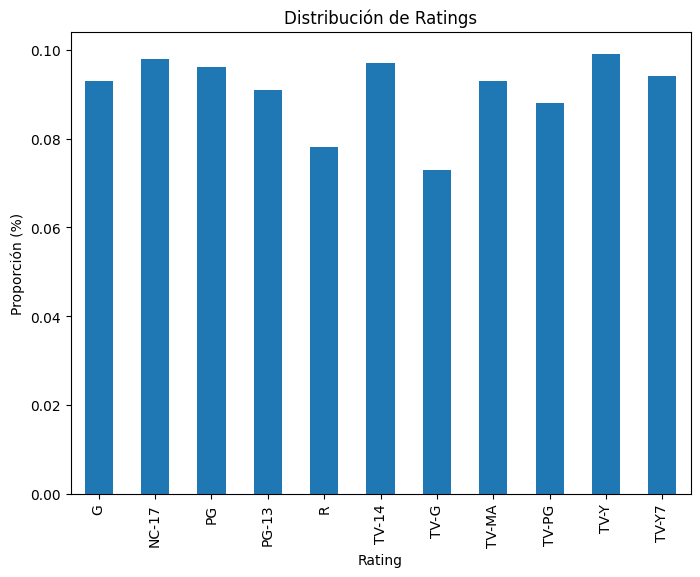

In [103]:
df1['rating'].value_counts(normalize=True).sort_index() * 100
#visualizo con un grafico de barras
df1['rating'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(8,6))
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Proporción (%)')
plt.show()

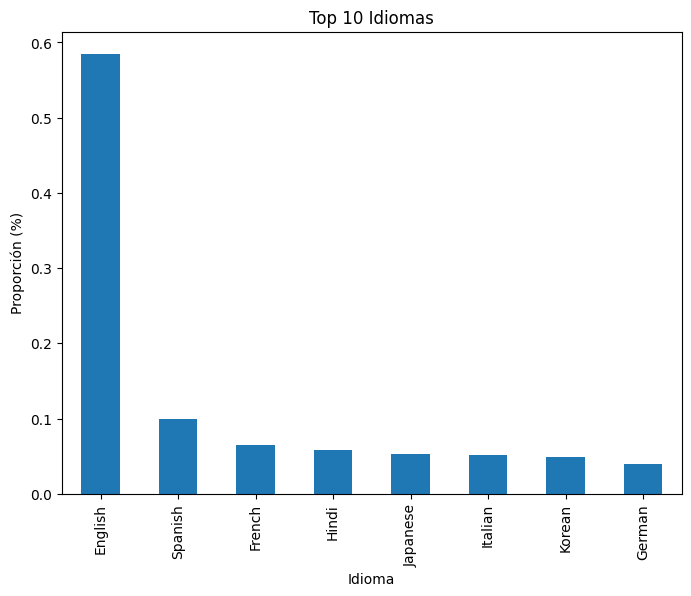

In [104]:
df1['language'].value_counts(normalize=True).head(10) * 100
#visualizo con un grafico de barras
df1['language'].value_counts(normalize=True).head(10).plot(kind='bar', figsize=(8,6))
plt.title('Top 10 Idiomas')
plt.xlabel('Idioma')
plt.ylabel('Proporción (%)')
plt.show()

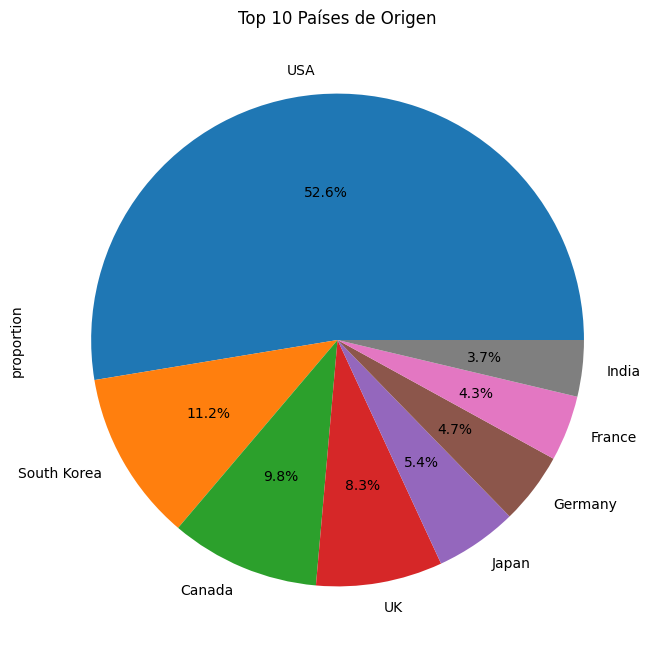

In [105]:
df1['country_of_origin'].value_counts(normalize=True).head(10) * 100
#visualizo con un pie chart
df1['country_of_origin'].value_counts(normalize=True).head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Top 10 Países de Origen')
plt.show()

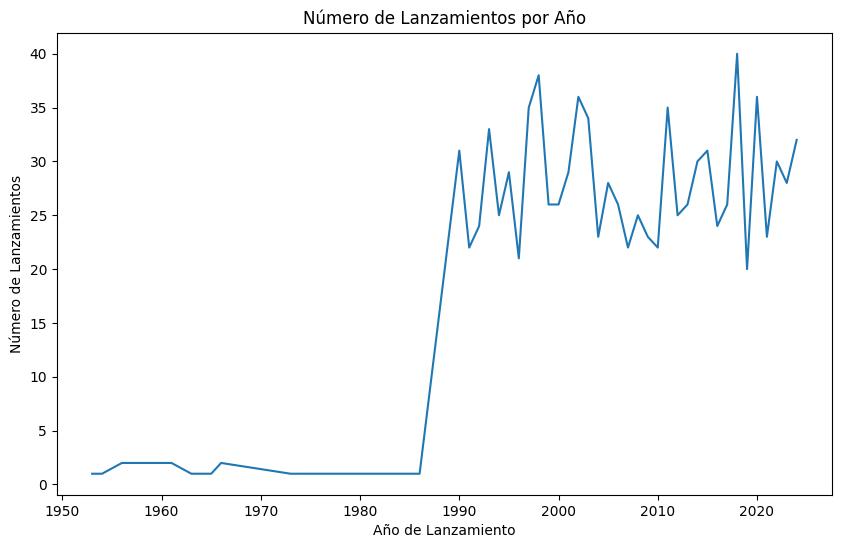

In [106]:
df1['release_year'].value_counts().sort_index()
#visualizo con un grafico de lineas
df1['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Número de Lanzamientos por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Lanzamientos')
plt.show()

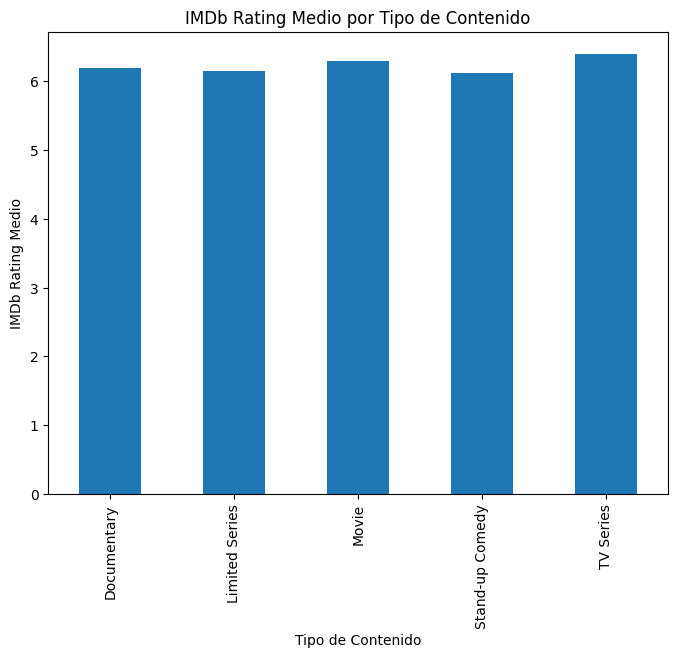

In [107]:
df1.groupby('content_type')['imdb_rating'].mean()
#visualizo con un grafico de barras
df1.groupby('content_type')['imdb_rating'].mean().plot(kind='bar', figsize=(8,6))
plt.title('IMDb Rating Medio por Tipo de Contenido')    
plt.xlabel('Tipo de Contenido')
plt.ylabel('IMDb Rating Medio')
plt.show()

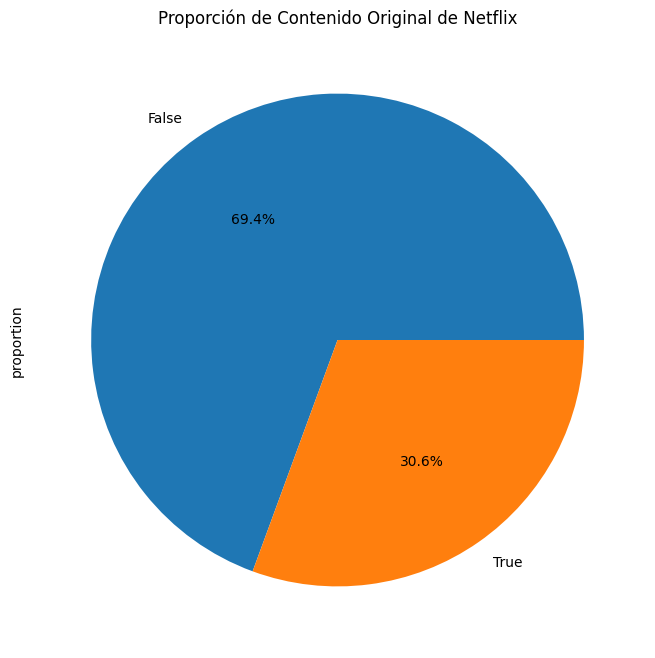

In [108]:
df1['is_netflix_original'].value_counts(normalize=True) * 100
#visualizo con un pie chart
df1['is_netflix_original'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Proporción de Contenido Original de Netflix')
plt.show()

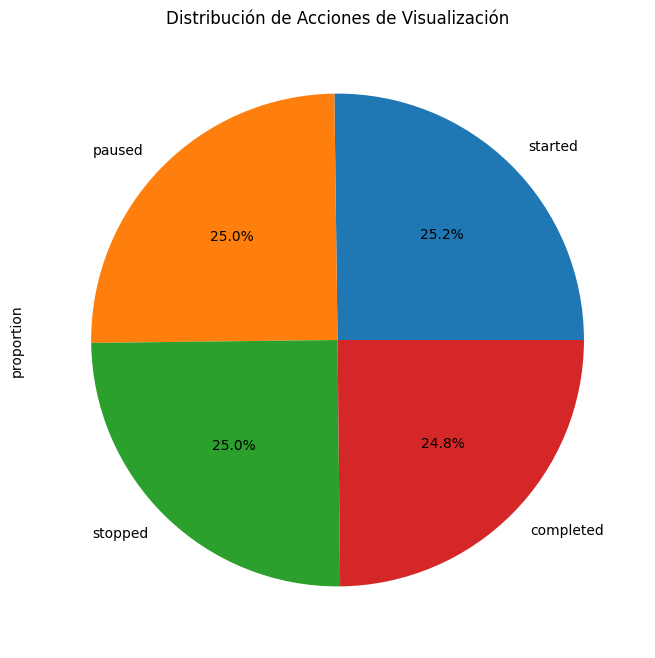

In [109]:
df2['action'].value_counts(normalize=True) * 100
#visualizo con un pie chart
df2['action'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribución de Acciones de Visualización')
plt.show()
#En el grafico de barras no se distinguia bien la información

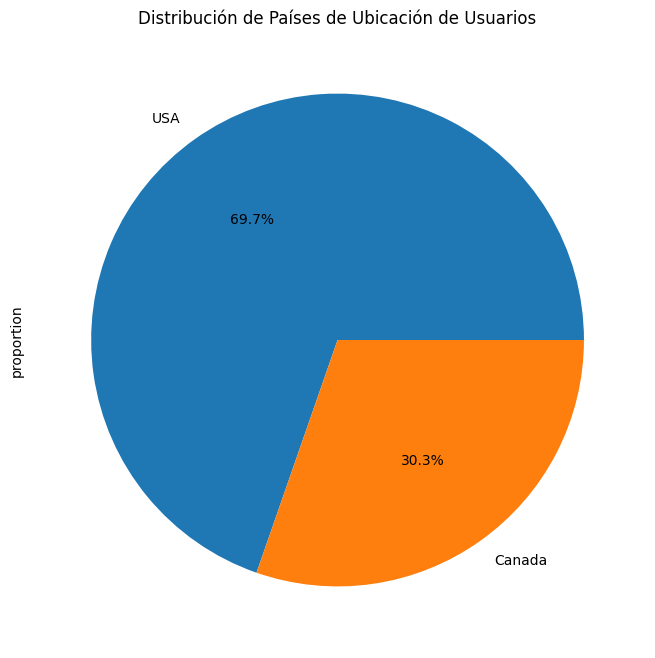

In [110]:
df2['location_country'].value_counts(normalize=True) * 100 
#visualizo con un pie chart
df2['location_country'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribución de Países de Ubicación de Usuarios')
plt.show()

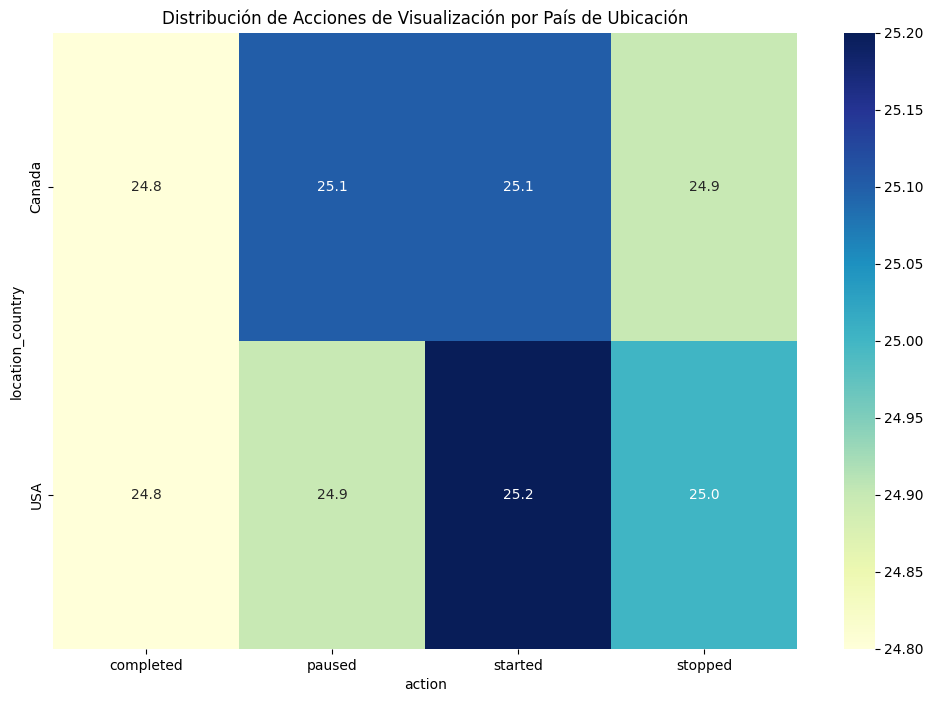

In [111]:
df2.groupby('location_country')['action'].value_counts(normalize=True).unstack().round(3) * 100
#visualizo con un heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df2.groupby('location_country')['action'].value_counts(normalize=True).unstack().round(3) * 100, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Distribución de Acciones de Visualización por País de Ubicación')
plt.show()

Text(0.5, 1.0, 'Distribución de Calidad de Visualización')

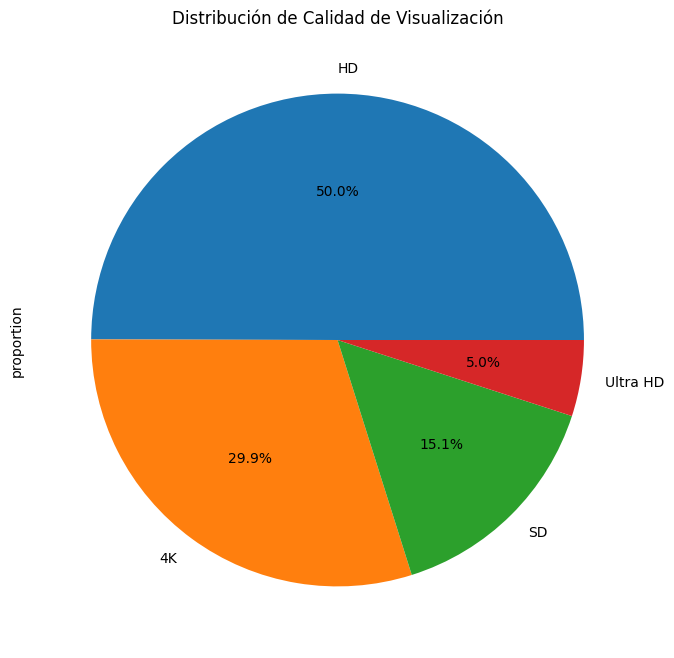

In [112]:
df2['quality'].value_counts(normalize=True) * 100
#visualizo con un pie chart
df2['quality'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribución de Calidad de Visualización')

Text(0.5, 1.0, 'Proporción de Contenido Descargado')

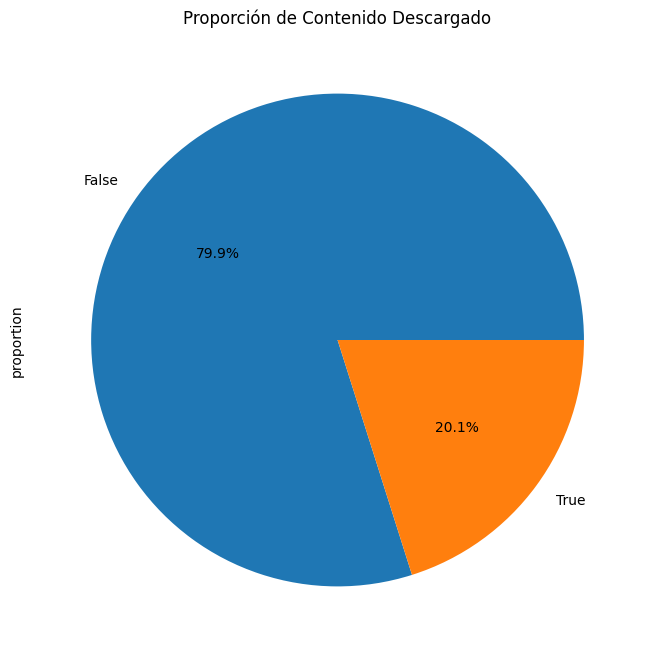

In [113]:
df2['is_download'].value_counts(normalize=True) * 100
#visualizo con un pie chart
df2['is_download'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Proporción de Contenido Descargado')

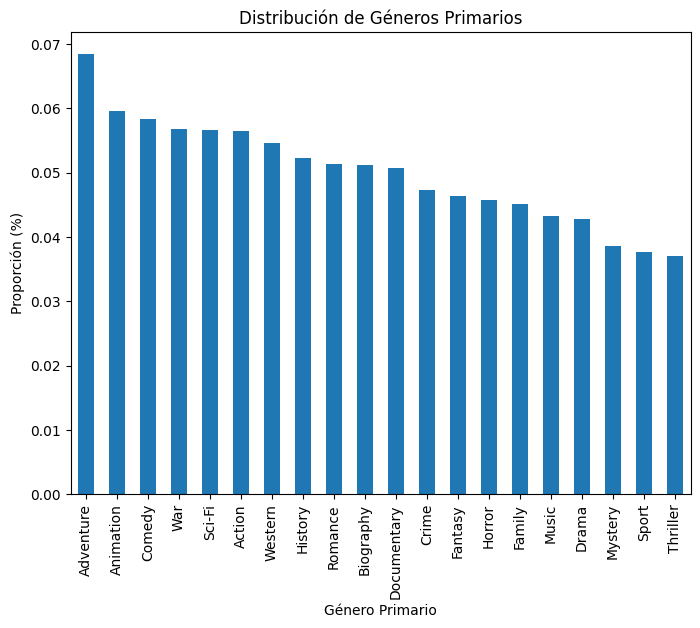

In [114]:

df_merged['genre_primary'].value_counts(normalize=True) * 100
#visualizo con un grafico de barras
df_merged['genre_primary'].value_counts(normalize=True).plot(kind='bar', figsize=(8,6))
plt.title('Distribución de Géneros Primarios')
plt.xlabel('Género Primario')
plt.ylabel('Proporción (%)')
plt.show()

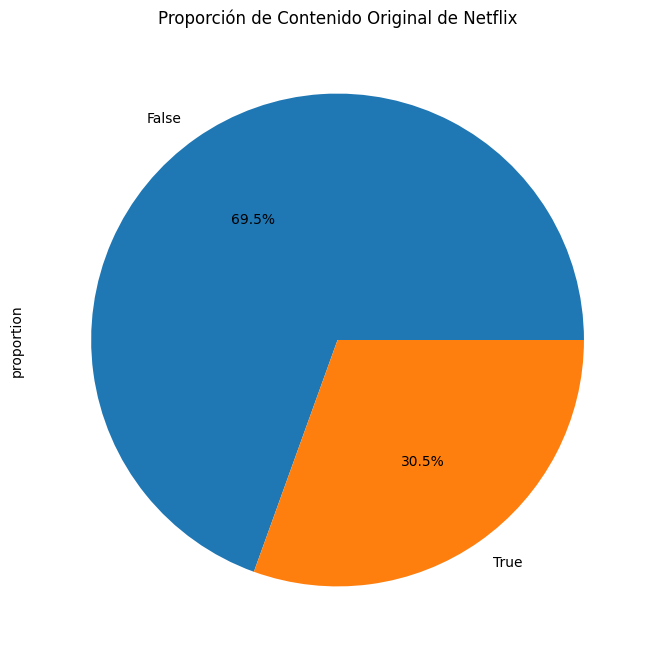

In [115]:
df_merged['is_netflix_original'].value_counts(normalize=True) * 100
#visualizo con un pie chart
df_merged['is_netflix_original'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))    
plt.title('Proporción de Contenido Original de Netflix')
plt.show()

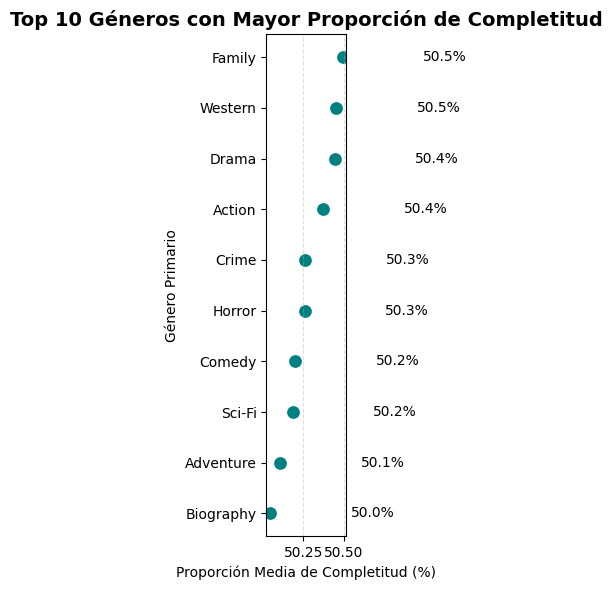

In [116]:
#que generos se completan más con las visualizaciones
genre_progress = (df_merged.groupby('genre_primary')['progress_percentage'].mean().sort_values(ascending=False).head(10))
#visualizo con un dotplot
# Crear el dot plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=genre_progress.values,
    y=genre_progress.index,
    s=100,
    color='teal'
)

# Añadir etiquetas con los porcentajes
for i, (genre, value) in enumerate(zip(genre_progress.index, genre_progress.values)):
    plt.text(value + 0.5, i, f"{value:.1f}%", va='center', fontsize=10, color='black')

# Personalización del gráfico
plt.title('Top 10 Géneros con Mayor Proporción de Completitud', fontsize=14, fontweight='bold')
plt.xlabel('Proporción Media de Completitud (%)')
plt.ylabel('Género Primario')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


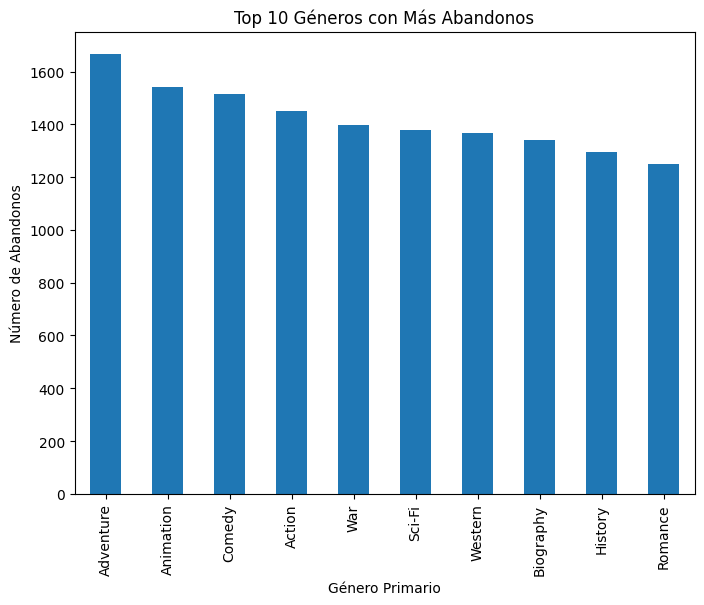

In [117]:
df_merged[df_merged['action'] == 'stopped']['genre_primary'].value_counts().head(10)
#visualizo con un grafico de barras
df_merged[df_merged['action'] == 'stopped']['genre_primary'].value_counts().head(10).plot(kind='bar', figsize=(8,6))
plt.title('Top 10 Géneros con Más Abandonos')   
plt.xlabel('Género Primario')
plt.ylabel('Número de Abandonos')
plt.show()

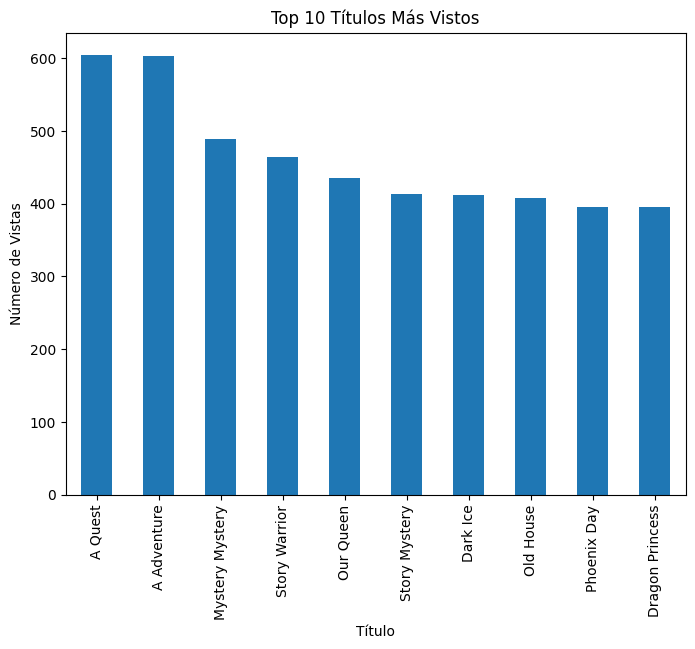

In [118]:
df_merged['title'].value_counts().head(10)
#visualizo con un grafico de barras
df_merged['title'].value_counts().head(10).plot(kind='bar', figsize=(8,6))
plt.title('Top 10 Títulos Más Vistos')
plt.xlabel('Título')
plt.ylabel('Número de Vistas')
plt.show()

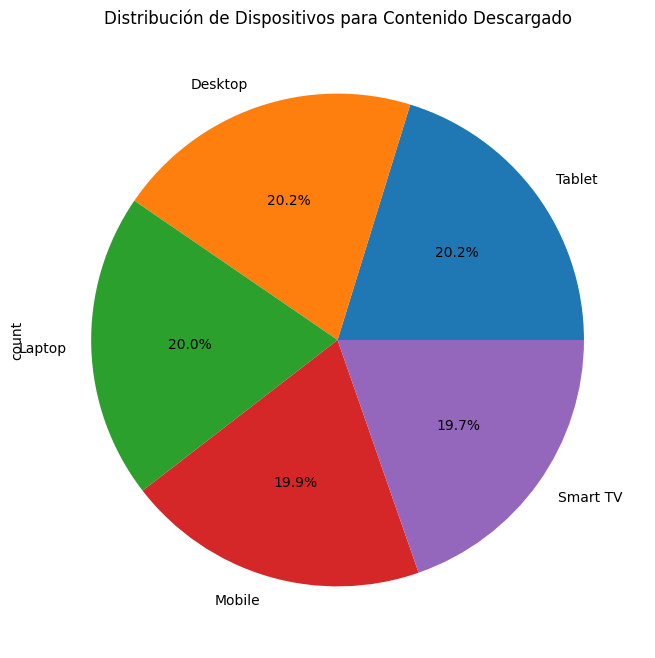

In [119]:
df_merged[df_merged['is_download'] == True]['device_type'].value_counts()
#visualizo con un pie chart
df_merged[df_merged['is_download'] == True]['device_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribución de Dispositivos para Contenido Descargado')
plt.show()

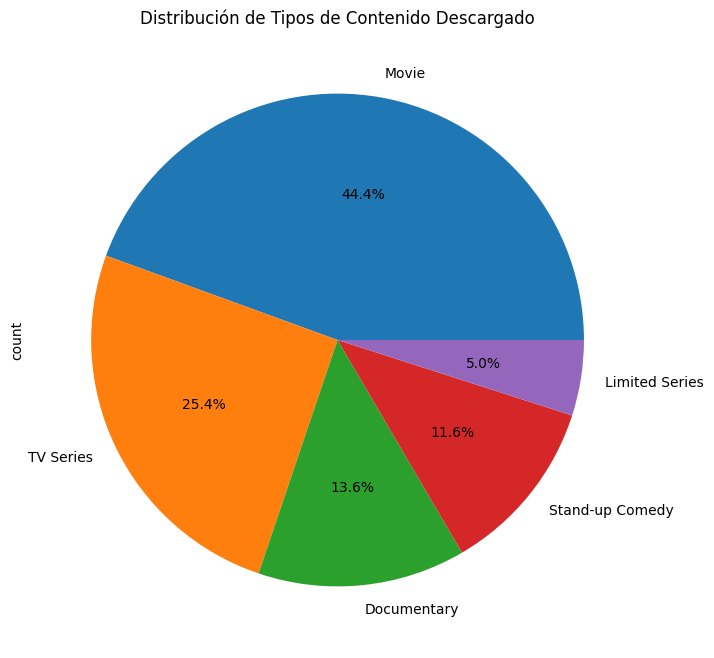

In [120]:
df_merged[df_merged['is_download'] == True]['content_type'].value_counts()
#visualizo con un pie chart
df_merged[df_merged['is_download'] == True]['content_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribución de Tipos de Contenido Descargado')
plt.show()

In [121]:
#exporto el df_merged a csv para importarlo en otras herramientas de análisis
df_merged.to_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/PFinal/Data/df_merged_completo.csv', index=False)